In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('ext_rate_n10000.csv')
dftraj = pd.read_csv('trajectories_n10000.csv')

df = pd.merge(df, dftraj, on=['SeasonLength','Trajectory'])
df['Dead'] = df['FinalTime'] < 150
df['DeadWhen'] = df['Time'] + 50 > df['FinalTime']
df['Round'] = np.minimum(df['Time'] // df['SeasonLength'], 100 // df['SeasonLength'])
df['Ab'] = df['Round'] % 2

#df = df[df['Trajectory'] < 100]
df

,SeasonLength,Trajectory,FinalTime,Time,x0,x1,x2,x3,Dead,DeadWhen,Round,Ab
0,1,0,150.1,1.1,40,0,0,0,False,False,1.0,1.0
1,1,0,150.1,2.0,41,0,0,0,False,False,2.0,0.0
2,1,0,150.1,3.0,48,0,0,0,False,False,3.0,1.0
3,1,0,150.1,4.0,46,0,0,0,False,False,4.0,0.0
4,1,0,150.1,5.1,48,0,0,0,False,False,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4772182,100,9995,150.1,100.1,1,72,0,0,False,False,1.0,1.0
4772183,100,9996,112.6,100.1,0,75,0,0,True,True,1.0,1.0
4772184,100,9997,150.1,100.1,2,74,0,0,False,False,1.0,1.0
4772185,100,9998,150.1,100.1,46,0,0,0,False,False,1.0,1.0


In [3]:
#X1 = df.drop(columns=['Trajectory','FinalTime','Time','Dead','Ab','Round','SeasonLength'])  # Las 5 features
#X2 = df.drop(columns=['Trajectory','FinalTime','Time','Dead','Ab','Round'])  # Las 5 features
#X3 = df.drop(columns=['Trajectory','FinalTime','Time','Dead','Ab'])  # Las 5 features

X4 = df.drop(columns=['Trajectory','FinalTime','Time','Dead','Round','SeasonLength','DeadWhen'])  # Las 5 features

X4['x1A'] = X4['x1']*X4['Ab']
X4['x1B'] = X4['x1']*(1-X4['Ab'])
X4['x2A'] = X4['x2']*X4['Ab']
X4['x2B'] = X4['x2']*(1-X4['Ab'])

X4 = X4.drop(columns=['x1','x2','Ab'])

y = df['DeadWhen'].astype(int)   # Convertimos True/False a 1/0

In [4]:
# Crear el modelo
model4 = LogisticRegression(max_iter=4000, verbose=0,C=100)  # Puedes aumentar max_iter si no converge

# Ajustar el modelo
model4.fit(X4, y)
print('... Model 4 fitted')
coefficients4 = pd.Series(model4.coef_[0], index=X4.columns)
print(coefficients4)

... Model 4 fitted
x0    -0.124302
x3    -0.978612
x1A    0.014996
x1B   -0.078326
x2A   -0.035248
x2B    0.009665
dtype: float64


In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

y_pred = model4.predict(X4)
y_pred_proba = model4.predict_proba(X4)[:,1]

print("Accuracy:", round(accuracy_score(y, y_pred),4))
print("AUC:", round(roc_auc_score(y, y_pred_proba),4))
print("Log-loss:", round(log_loss(y, y_pred_proba),4))
print("Score (pseudo R^2 ~ McFadden):", round(model4.score(X4, y),4))

Accuracy: 0.9743
AUC: 0.9491
Log-loss: 0.0736
Score (pseudo R^2 ~ McFadden): 0.9743


In [9]:
#df['p_model1'] = model1.predict_proba(X1)[:,1]
#df['p_model2'] = model2.predict_proba(X2)[:,1]
#df['p_model3'] = model3.predict_proba(X3)[:,1]
df['p_model4'] = model4.predict_proba(X4)[:,1]

df

,SeasonLength,Trajectory,FinalTime,Time,x0,x1,x2,x3,Dead,DeadWhen,Round,Ab,p_model4
0,1,0,150.1,1.1,40,0,0,0,False,False,1.0,1.0,0.002572
1,1,0,150.1,2.0,41,0,0,0,False,False,2.0,0.0,0.002272
2,1,0,150.1,3.0,48,0,0,0,False,False,3.0,1.0,0.000953
3,1,0,150.1,4.0,46,0,0,0,False,False,4.0,0.0,0.001222
4,1,0,150.1,5.1,48,0,0,0,False,False,5.0,1.0,0.000953
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772182,100,9995,150.1,100.1,1,72,0,0,False,False,1.0,1.0,0.491778
4772183,100,9996,112.6,100.1,0,75,0,0,True,True,1.0,1.0,0.534047
4772184,100,9997,150.1,100.1,2,74,0,0,False,False,1.0,1.0,0.468243
4772185,100,9998,150.1,100.1,46,0,0,0,False,False,1.0,1.0,0.001222


In [10]:
df = df.sort_values(by=['SeasonLength', 'Trajectory', 'Round'])

# Lista de columnas de entrada y sus salidas
#p_columns = ['p_model1', 'p_model2', 'p_model3', 'p_model4']
p_columns = ['p_model4']
#P_columns = ['P_model1', 'P_model2', 'P_model3', 'P_model4']
P_columns = ['P_model4']

# Inicializar columnas de salida
for P_col in P_columns:
    df[P_col] = np.nan

# Agrupar una vez para eficiencia
grouped = df.groupby(['SeasonLength', 'Trajectory'])

# Iterar con barra de progreso
for (seasonlength, trajectory), group_idx in tqdm(grouped.groups.items(), desc="Procesando grupos"):
    for p_col, P_col in zip(p_columns, P_columns):
        p_vals = df.loc[group_idx, p_col]
        cumprod = (1 - p_vals).shift().cumprod().fillna(1)
        df.loc[group_idx, P_col] = p_vals * cumprod

Procesando grupos: 100%|████████████| 1000000/1000000 [06:23<00:00, 2610.39it/s]


In [11]:
#dfext = df.groupby(['SeasonLength','Trajectory']).mean(numeric_only=True).reset_index()
dfext = df.groupby(['SeasonLength','Round']).mean(numeric_only=True).reset_index()
dfext = dfext.groupby(['SeasonLength']).sum(numeric_only=True).reset_index()
#dfext = dfext.groupby(['SeasonLength']).mean(numeric_only=True).reset_index()
dfext

,SeasonLength,Round,Trajectory,FinalTime,Time,x0,x1,x2,x3,Dead,DeadWhen,Ab,p_model4,P_model4
0,1,5050.0,499950.0,15004.64300,5054.0,4230.0212,90.2597,89.0545,74.3749,0.1800,0.0543,50.0,0.387990,0.245827
1,2,1275.0,249975.0,7501.96850,2552.0,2107.3112,49.0048,47.5805,41.8949,0.0950,0.0313,25.0,0.216312,0.148316
2,3,561.0,164983.5,4950.61149,1684.3,1386.3384,34.4317,35.6948,29.3680,0.0825,0.0275,17.0,0.159700,0.113346
3,4,325.0,124987.5,3749.96500,1301.0,1043.8877,31.4363,30.0456,26.3510,0.0875,0.0272,13.0,0.138449,0.100710
4,5,210.0,99990.0,2998.97480,1050.8,831.2747,25.4762,28.6441,23.8057,0.1020,0.0328,10.0,0.125017,0.091438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1.0,4999.5,141.46828,96.1,18.0825,46.7633,0.0451,1.9575,0.2564,0.2562,1.0,0.233364,0.233364
96,97,1.0,4999.5,141.79711,97.1,18.2909,46.3571,0.0421,1.9453,0.2547,0.2547,1.0,0.230803,0.230803
97,98,1.0,4999.5,142.09089,98.1,18.3629,46.3467,0.0413,1.9299,0.2531,0.2527,1.0,0.228970,0.228970
98,99,1.0,4999.5,142.32496,99.1,18.2787,46.3405,0.0354,1.9830,0.2540,0.2539,1.0,0.230624,0.230624


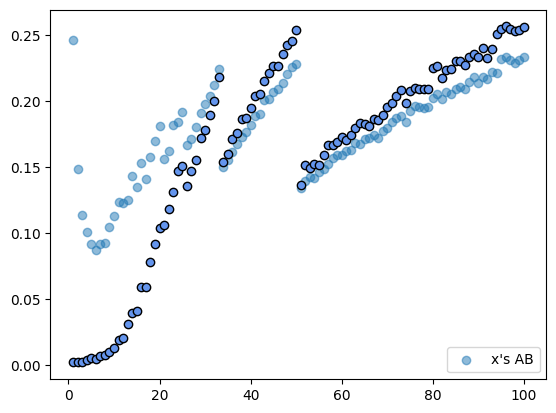

In [12]:
#------------------------
dfaux = pd.read_csv('../Extinction curve-Tau/ext_rate_n10000.csv')
dfaux['Dead'] = dfaux['FinalTime'] < 150

dfextaux = dfaux.groupby(['Dead', 'SeasonLength','Trajectory']).count().reset_index()
dfextaux = dfextaux.groupby(['Dead', 'SeasonLength']).count().reset_index()
dfextaux['ExtRate'] = 1 - dfextaux['Trajectory']/10000

dfextaux = dfextaux[dfextaux['Dead']==False]
plt.scatter(dfextaux['SeasonLength'], dfextaux['ExtRate'], ec='black',color='cornflowerblue',zorder=10)
#------------------------

#plt.scatter(dfext['SeasonLength'], dfext['P_model1'],label='x\'s only',alpha=0.5)
#plt.scatter(dfext['SeasonLength'], dfext['P_model2'],label='x\'s plus seasonLength',alpha=0.5)
#plt.scatter(dfext['SeasonLength'], dfext['P_model3'],label='x\'s plus seasonLength plus round',alpha=0.5)
plt.scatter(dfext['SeasonLength'], dfext['P_model4'],label='x\'s AB',alpha=0.5)




plt.legend()
plt.show()

In [13]:
dfextaux

,Dead,SeasonLength,Trajectory,FinalTime,ExtRate
0,False,1,9982,9982,0.0018
1,False,2,9981,9981,0.0019
2,False,3,9975,9975,0.0025
3,False,4,9965,9965,0.0035
4,False,5,9949,9949,0.0051
...,...,...,...,...,...
95,False,96,7436,7436,0.2564
96,False,97,7453,7453,0.2547
97,False,98,7469,7469,0.2531
98,False,99,7460,7460,0.2540


In [14]:
df.to_csv('prediccion_sigmoideX.csv')